# Prediksi Diagnosis Kanker Payudara

## Pendahuluan  
Kanker payudara merupakan salah satu jenis kanker yang paling umum dan menjadi penyebab utama kematian pada wanita di seluruh dunia. Menurut data dari World Health Organization (WHO), deteksi dini terhadap kanker payudara sangat penting untuk meningkatkan peluang kesembuhan dan menurunkan tingkat kematian. Salah satu metode yang dapat digunakan untuk mendeteksi kanker payudara adalah dengan menganalisis karakteristik sel kanker menggunakan teknologi komputer.  

Perkembangan teknologi di bidang kecerdasan buatan, khususnya machine learning, memungkinkan sistem komputer untuk melakukan analisis data secara otomatis dan menghasilkan prediksi yang akurat. Dengan memanfaatkan dataset medis yang telah tersedia, seperti Breast Cancer Wisconsin (Diagnostic) Dataset. Algoritma machine learning dapat dilatih untuk membedakan antara tumor jinak (benign) dan ganas (malignant).

## Data Understanding

### Sumber Data  
Dataset dapat dilihat pada link berikut ini :  
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic  

Dataset Breast Cancer Wisconsin (Diagnostic) dari UCI berisi data medis yang digunakan untuk memprediksi apakah suatu tumor bersifat ganas (malignant) atau jinak (benign) berdasarkan hasil pemeriksaan mikroskopik sel kanker.  

### Tujuan  
Dataset ini digunakan untuk membangun model klasifikasi untuk memprediksi ganas atau jinak nya tumor kanker payudara pada pasien, guna mendukung penelitian dan diagnosis medis.

### Integrasi Data  
Untuk mengolah data dari UCI Dataset, maka perlu menginstal pustaka (package) yang diperlukan. Instalasi ini bertujuan agar data yang tersedia di UCI dapat diunduh secara langsung ke dalam lingkungan Python untuk dianalisis lebih lanjut. Langkah pengambilan data dapat dilakukan dengan mengikuti instruksi yang muncul setelah menekan tombol "Import in Python" pada halaman dataset yang dipilih. Perintah tersebut akan memberikan kode Python yang siap digunakan untuk mengunduh dan memuat dataset secara otomatis.

In [96]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [97]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# gabungkan fitur dan target jadi satu dataframe
df = pd.concat([X, y], axis=1)

# simpan ke file CSV
df.to_csv("breast.csv", index=False)

# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

### Eksplorasi Data

Menampilkan 5 data dari dataset

In [98]:
display(df)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


Visualisasi distribusi data

In [99]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


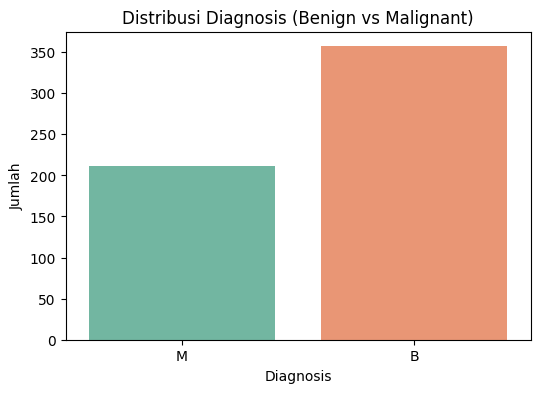

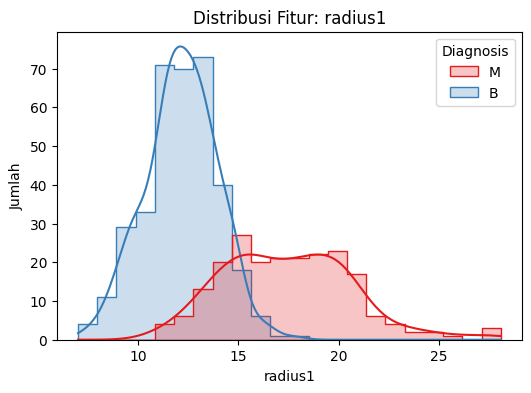

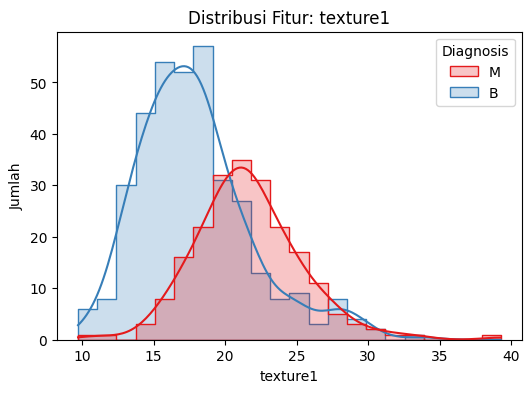

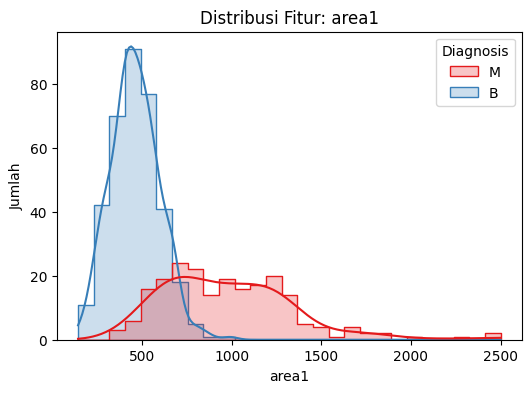

/tmp/ipykernel_8675/566655522.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=kolom_target, y='radius1', palette='Set3')


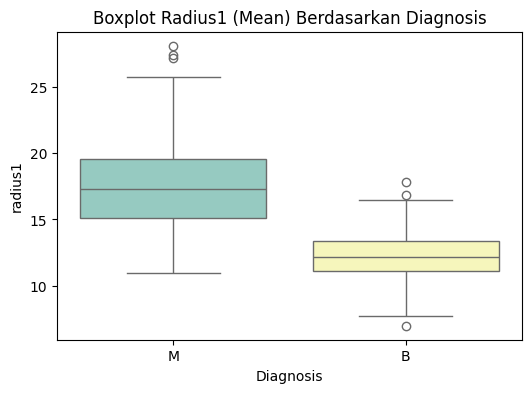

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom Diagnosis ada
kolom_target = 'Diagnosis'

# 1. Visualisasi distribusi diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=kolom_target, hue=kolom_target, palette='Set2', legend=False)
plt.title("Distribusi Diagnosis (Benign vs Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Jumlah")
plt.show()

# 2. Visualisasi distribusi fitur (contoh: mean features)
fitur_pilihan = ['radius1', 'texture1', 'area1']  # 1 = mean

for fitur in fitur_pilihan:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=fitur, hue=kolom_target, kde=True, palette='Set1', element='step')
    plt.title(f"Distribusi Fitur: {fitur}")
    plt.xlabel(fitur)
    plt.ylabel("Jumlah")
    plt.show()

# 3. Boxplot berdasarkan diagnosis
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x=kolom_target, y='radius1', palette='Set3')
plt.title("Boxplot Radius1 (Mean) Berdasarkan Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("radius1")
plt.show()


## Struktur Dataset

### Fitur dan Label  


In [101]:
df.shape

(569, 31)

Terdapat 569 baris data dan 31 kolom

In [102]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

Fitur adalah variabel atau atribut yang digunakan sebagai input dalam proses analisis data dan pemodelan machine learning. Fitur mewakili karakteristik, sifat, atau informasi yang dimiliki oleh suatu data. Terdapat 30 fitur dan 1 class pada dataset ini yaitu :  
* Fitur Mean (akhiran 1)
1. radius1: Rata-rata jarak dari pusat ke batas inti sel.

2. texture1: Rata-rata variasi tingkat keabuan (tekstur permukaan inti sel).

3. perimeter1: Rata-rata keliling dari inti sel.

4. area1: Rata-rata luas area inti sel.

5. smoothness1: Rata-rata kelicinan batas inti sel.

6. compactness1: Rata-rata kekompakan inti sel (perimeter² / area - 1.0).

7. concavity1: Rata-rata tingkat cekungan pada kontur inti sel.

8. concave_points1: Rata-rata jumlah titik-titik cekung pada kontur inti sel.

9. symmetry1: Rata-rata tingkat kesimetrian inti sel.

10. fractal_dimension1: Rata-rata kompleksitas kontur inti sel berdasarkan dimensi fraktal.  

*  Fitur Standard Error (akhiran 2)  
11. radius2: Standard error dari ukuran radius inti sel.

12. texture2: Standard error dari tekstur inti sel.

13. perimeter2: Standard error dari keliling inti sel.

14. area2: Standard error dari luas area inti sel.

15. smoothness2: Standard error dari kelicinan batas inti sel.

16. compactness2: Standard error dari kekompakan inti sel.

17. concavity2: Standard error dari tingkat cekungan kontur inti sel.

18. concave_points2: Standard error dari jumlah titik cekung pada kontur inti sel.

19. symmetry2: Standard error dari tingkat simetri inti sel.

20. fractal_dimension2: Standard error dari kompleksitas kontur inti sel.  

* Fitur Terburuk (akhiran 3)  
21. radius3: Nilai maksimum radius inti sel (terburuk).

22. texture3: Nilai maksimum variasi tekstur inti sel.

23. perimeter3: Nilai maksimum keliling inti sel.

24. area3: Nilai maksimum luas area inti sel.

25. smoothness3: Nilai maksimum kelicinan batas inti sel.

26. compactness3: Nilai maksimum kekompakan inti sel.

27. concavity3: Nilai maksimum tingkat cekungan kontur inti sel.

28. concave_points3: Nilai maksimum jumlah titik-titik cekung pada kontur inti sel.

29. symmetry3: Nilai maksimum tingkat simetri inti sel.

30. fractal_dimension3: Nilai maksimum kompleksitas kontur inti sel.  

*  Kolom Target  
31. Diagnosis: Label target yang menunjukkan jenis tumor:  
* M = Malignant (ganas)  
B = Benign (jinak)

In [103]:
df.dtypes

radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
Diagnosis              object
dtype: object

Semua fitur memiliki tipe data float sedangkan target/class bertipe data object/kategorikal

In [104]:
df.groupby('Diagnosis').size()

Diagnosis
B    357
M    212
dtype: int64

Pada kelas Malignant (ganas) sebanyak 212 data, sedangkan kelas Benign (jinak) sebanyak 357 data.

### Mengidentifikasi Kualitas Dataset  

1. Cek Missing Value (Nilai Hilang)  
* Memeriksa apakah ada data yang kosong (NaN) pada kolom fitur atau target.  
* Tidak ada mising value pada dataset

In [105]:
print(df.isnull().sum())

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64


2. Cek Duplikat  
* Mengidentifikasi apakah ada baris data yang terduplikasi.  
* Tidak ada data duplikat pada dataset ini

In [106]:
df.duplicated().sum()

0

## Preprocessing  Data  


### Transformasi Data  
Pada Dataset ini class yang ada di kolom Diagnosis bertipe data kategorikal, maka perlu dilakukan transformasi data yaitu mengubah data kategorikal ke data numerik. Kelas Malignant menjadi 1 dan Benign menjadi 0.

In [107]:
# Ubah nilai Diagnosis dari M/B menjadi 1/0
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Cek hasil transformasi
print(df['Diagnosis'].value_counts())

df_clean.to_csv("encode.csv", index=False)

Diagnosis
0    357
1    212
Name: count, dtype: int64


### Mendeteksi dan Menghapus Outlier dengan LOF  
**Konsep Local Outlier Factor**  
Local Outlier Factor (LOF) adalah sebuah metode deteksi outlier berbasis tetangga terdekat (k-NN) yang mengukur seberapa jauh kepadatan lokal sebuah titik data dibandingkan dengan kepadatan tetangganya.

LOF tidak hanya melihat seberapa jauh suatu titik dari titik lainnya, tetapi juga membandingkan kepadatan lokal di sekitarnya. Jadi, LOF bisa mendeteksi outlier yang “lokal”, yaitu titik-titik yang menyimpang dalam wilayah padat maupun wilayah jarang.  

**Langkah-langkah LOF**  
1. Menentukan jumlah tetangga terdekat (k-nearest neighbors)  
2. Menghitung reachability distance untuk setiap titik.  
3. Menghitung local reachability density (LRD).  
4. Menghitung LOF sebagai rasio LRD titik terhadap LRD tetangganya.  
5. Menentukan apakah titik termasuk outlier berdasarkan skor LOF.  



In [108]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# 1. Load file CSV (yang sudah di-encode Diagnosis)
df = pd.read_csv('encode.csv')


# 3. Pisahkan fitur numerik (tanpa Diagnosis dan ID)
fitur = df.drop(columns=['ID', 'Diagnosis','LOF Score', 'Prediksi'])

# 4. Terapkan LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
pred = lof.fit_predict(fitur)  # Hasil: 1 (inlier), -1 (outlier)

# 5. Hapus outlier
df_clean = df[pred == 1].copy()

# 6. Tampilkan info pembersihan
print("Jumlah data sebelum dibersihkan:", df.shape[0])
print("Jumlah data setelah dibersihkan :", df_clean.shape[0])
print("Jumlah outlier yang dihapus     :", df.shape[0] - df_clean.shape[0])

# 7. Simpan hasil bersih (jika ingin)
df_clean.to_csv("breast_cancer_tanpa_outlier.csv", index=False)


Jumlah data sebelum dibersihkan: 513
Jumlah data setelah dibersihkan : 487
Jumlah outlier yang dihapus     : 26


### Modelling Klasifikasi Gaussian Naive Bayes  
Gaussian Naive Bayes merupakan salah satu algoritma klasifikasi dalam pembelajaran mesin yang berdasarkan pada teorema Bayes dengan asumsi bahwa antar fitur tidak saling bergantung (naive assumption) dan data numerik berdistribusi normal (Gaussian distribution).

Algoritma ini sangat cocok digunakan untuk data dengan fitur numerik, seperti dataset Breast Cancer Wisconsin (Diagnostic) yang memiliki fitur hasil pengukuran morfologi sel. Gaussian Naive Bayes menghitung peluang masing-masing kelas berdasarkan distribusi normal dari setiap fitur, kemudian memilih kelas dengan probabilitas tertinggi sebagai prediksi.  

#### Tujuan Modeling
Tujuan dari penerapan Gaussian Naive Bayes pada dataset ini adalah untuk:

Mengklasifikasikan data menjadi dua kelas, yaitu benign (jinak) dan malignant (ganas).

Mengukur performa model dalam mendeteksi kanker payudara berdasarkan fitur-fitur numerik yang tersedia.

#### Langkah-langkah Modeling  
1. Membagi Data (Train-Test Split)  
Data dibagi menjadi dua bagian menggunakan metode train_test_split :  
* 80% data untuk pelatihan (training)  
* 20% data untuk pengujian (testing)
Pembagian dilakukan secara acak dengan parameter random_state untuk hasil yang konsisten.  

2. Pelatihan Model  
Model Gaussian Naive Bayes dibuat menggunakan pustaka sklearn.naive_bayes.GaussianNB, dan dilatih pada data training.  

3. Prediksi dan Evaluasi
Setelah model dilatih, data testing digunakan untuk melakukan prediksi. Evaluasi dilakukan menggunakan beberapa metrik:  
* Akurasi: Persentase prediksi yang benar dari total data.
* Confusion Matrix: Matriks yang menunjukkan jumlah true positive, false positive, true negative, dan false negative.
* Classification Report: Menyajikan metrik precision, recall, dan F1-score untuk tiap kelas.  



In [109]:
df.columns

Index(['ID', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis', 'LOF Score',
       'Prediksi'],
      dtype='object')

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# 1. Load data tanpa outlier
df = pd.read_csv('breast_cancer_tanpa_outlier.csv')

# 2. Pisahkan fitur dan target
X = df.drop(columns=['Diagnosis', 'ID', 'LOF Score', 'Prediksi'], errors='ignore')
y = df['Diagnosis']

# 3. Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 5. Prediksi dan evaluasi
y_pred = model.predict(X_test)

print("Akurasi       :", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi       : 0.9795918367346939

Confusion Matrix:
 [[65  1]
 [ 1 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        66
           1       0.97      0.97      0.97        32

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



### Modelling Klasifikasi Decision Tree  
Decision Tree (pohon keputusan) adalah salah satu algoritma dalam pembelajaran mesin yang digunakan untuk klasifikasi dan regresi, dengan cara membagi data ke dalam kelompok-kelompok berdasarkan serangkaian aturan keputusan (if-then-else) yang diturunkan dari fitur-fitur input.
Model ini berbentuk seperti struktur pohon, di mana:  
* Node merepresentasikan atribut/fitur,
* Cabang (branch) mewakili kondisi atau aturan,
* Daun (leaf node) merupakan hasil akhir berupa kelas prediksi.  

#### Tujuan Modeling
Penerapan Decision Tree pada dataset Breast Cancer Wisconsin (Diagnostic) bertujuan untuk:  
* Membangun model klasifikasi yang mampu memprediksi apakah suatu sampel merupakan kanker ganas (malignant) atau jinak (benign).
* Memahami alur pengambilan keputusan berdasarkan fitur morfologi sel dalam data.  

#### Langkah-langkah Modelling  
1. Membagian Data (Train-Test Split)  
Dataset dibagi menjadi data pelatihan dan data pengujian dengan proporsi 80:20 menggunakan fungsi train_test_split. Data pelatihan digunakan untuk membangun model, sementara data pengujian digunakan untuk mengukur performa model terhadap data yang belum pernah dilihat.  
2. Pembuatan dan Pelatihan Model  
Model Decision Tree dibangun menggunakan pustaka sklearn.tree.DecisionTreeClassifier. Algoritma ini secara otomatis membentuk struktur pohon berdasarkan pembagian data yang memaksimalkan gain informasi (Information Gain) atau impuritas seperti Gini index.  
3. Prediksi dan Evaluasi
Setelah model dilatih, dilakukan prediksi terhadap data pengujian. Evaluasi model dilakukan dengan metrik:
* Akurasi: Tingkat ketepatan model dalam memprediksi label.  
* Confusion Matrix: Matriks yang menggambarkan jumlah prediksi benar dan salah.  
* Classification Report: Berisi metrik precision, recall, dan F1-score untuk tiap kelas.




In [118]:

from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load data tanpa outlier
df = pd.read_csv('breast_cancer_tanpa_outlier.csv')

# 2. Pisahkan fitur dan target
X = df.drop(columns=['Diagnosis', 'ID', 'LOF Score', 'Prediksi'], errors='ignore')
y = df['Diagnosis']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
modeldt = DecisionTreeClassifier(random_state=42)
modeldt.fit(X_train, y_train)

# Prediksi data test
y_pred = modeldt.predict(X_test)

# Evaluasi model
print("Akurasi       :", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi       : 0.9795918367346939

Confusion Matrix:
 [[65  1]
 [ 1 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        66
           1       0.97      0.97      0.97        32

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



### Evaluasi 
$
\begin{array}{lcccc}
\hline
\textbf{Model} & \textbf{Akurasi} \\
\hline
\text{Gaussian Naive Bayes} & 0.9795918367346939 \\
\text{Decision tree} &  0.9795918367346939 \\
\hline
\end{array}
$  

Kedua model menunjukkan hasil akurasi yang sama, yaitu sebesar 97.96%, yang menunjukkan bahwa model mampu memprediksi jenis kanker dengan tingkat ketepatan yang sangat tinggi.

Hasil confusion matrix dari kedua model juga identik, menunjukkan bahwa:
* Sebagian besar kasus jinak dan ganas berhasil diklasifikasikan dengan benar.
* Jumlah kesalahan prediksi (false positive dan false negative) sangat sedikit, sehingga model dapat dikatakan cukup andal.

### Deployment  
#### Menyimpan model  

In [119]:
import pickle

nama_model = "breast.pkl"

with open(nama_model, 'wb') as file:
    pickle.dump(modeldt, file)

#### Hasil Web  
link web : https://pendata-bhcajlmnjr8buzvdjvu5am.streamlit.app/ 